In [1]:
import pandas as pd

main_df = pd.read_csv('ptsd_data.csv')
print(main_df.head(20))

   gender  alcohol smoking partner  kids  age  missions  salary      ptsd
0     NaN     16.0     yes      no   0.0   21         0   31000  0.336762
1     man      NaN     yes     yes   0.0   25         0   34000  0.532707
2     man     15.0     NaN     NaN   0.0   37         0   17000  0.314106
3     man     13.0     yes     NaN   NaN   40         4   12000  0.590893
4     NaN      NaN      no      no   1.0   34         0   16000  0.277474
5     man     15.0      no      no   0.0   30         0   48000  0.417319
6     man     14.0     NaN      no   0.0   43         2   50000  0.549666
7     man     12.0      no     yes   0.0   48         4   49000  0.616401
8   woman      3.0      no     yes   0.0   21         1   26000  0.253997
9   woman      4.0     yes     yes   1.0   41         1   41000  0.200944
10    man     13.0     yes      no   0.0   40         5   49000  0.641686
11    man     15.0      no     yes   0.0   33         2   44000  0.447075
12    man     17.0     yes      no   1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

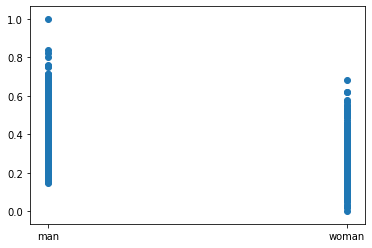

In [3]:
gender_df = main_df[['gender', 'ptsd']].copy()
gender_df.dropna(inplace=True)

X = np.array(gender_df['gender'])
y = np.array(gender_df['ptsd'])

plt.scatter(X, y)
plt.show()

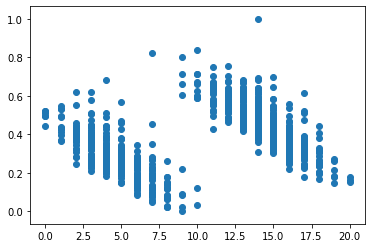

In [4]:
alcohol_df = main_df[['alcohol', 'ptsd']].copy()
alcohol_df.dropna(inplace=True)

X = np.array(alcohol_df['alcohol'])
y = np.array(alcohol_df['ptsd'])

plt.scatter(X, y)
plt.show()

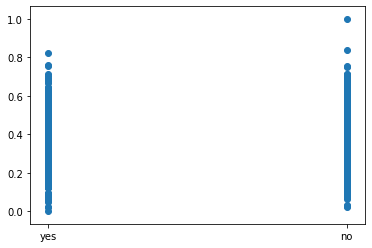

In [5]:
smoking_df = main_df[['smoking', 'ptsd']].copy()
smoking_df.dropna(inplace=True)

X = np.array(smoking_df['smoking'])
y = np.array(smoking_df['ptsd'])

plt.scatter(X, y)
plt.show()

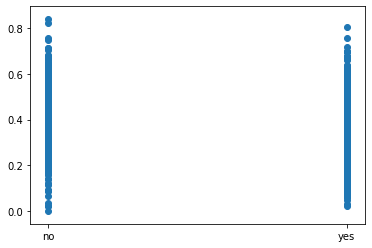

In [6]:
partner_df = main_df[['partner', 'ptsd']].copy()
partner_df.dropna(inplace=True)

X = np.array(partner_df['partner'])
y = np.array(partner_df['ptsd'])

plt.scatter(X, y)
plt.show()

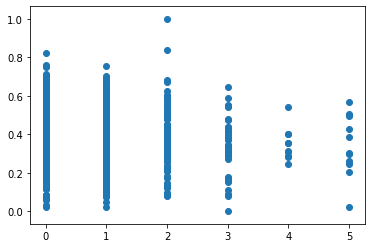

In [7]:
kids_df = main_df[['kids', 'ptsd']].copy()
kids_df.dropna(inplace=True)

X = np.array(kids_df['kids'])
y = np.array(kids_df['ptsd'])

plt.scatter(X, y)
plt.show()

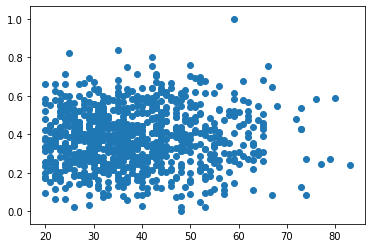

In [8]:
age_df = main_df[['age', 'ptsd']].copy()
age_df.dropna(inplace=True)

X = np.array(age_df['age'])
y = np.array(age_df['ptsd'])

plt.scatter(X, y)
plt.show()

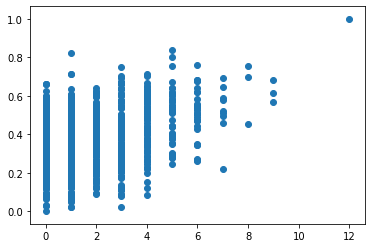

In [9]:
missions_df = main_df[['missions', 'ptsd']].copy()
missions_df.dropna(inplace=True)

X = np.array(missions_df['missions'])
y = np.array(missions_df['ptsd'])

plt.scatter(X, y)
plt.show()

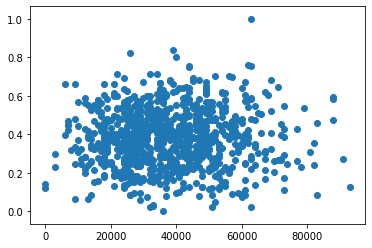

In [10]:
salary_df = main_df[['salary', 'ptsd']].copy()
salary_df.dropna(inplace=True)

X = np.array(salary_df['salary'])
y = np.array(salary_df['ptsd'])

plt.scatter(X, y)
plt.show()

In [11]:
current_df = main_df.copy()
current_df['gender'] = current_df['gender'].map({'man': 1, 'woman': 0})
current_df['smoking'] = current_df['smoking'].map({'yes': 1, 'no': 0})
current_df['partner'] = current_df['partner'].map({'yes': 1, 'no': 0})

current_df['gender'].fillna(0.5, inplace=True)
current_df['alcohol'].fillna(current_df['alcohol'].mean(), inplace=True)
current_df['smoking'].fillna(0.5, inplace=True)
current_df['partner'].fillna(0.5, inplace=True)
current_df['kids'].fillna(0, inplace=True)
current_df['age'].fillna(current_df['age'].mean(), inplace=True)
current_df['missions'].fillna(0, inplace=True)
current_df['salary'].fillna(current_df['salary'].mean(), inplace=True)

current_df['ptsd'].dropna(inplace=True)

print(current_df.head())
print(len(current_df))

   gender    alcohol  smoking  partner  kids  age  missions  salary      ptsd
0     0.5  16.000000      1.0      0.0   0.0   21         0   31000  0.336762
1     1.0  10.562657      1.0      1.0   0.0   25         0   34000  0.532707
2     1.0  15.000000      0.5      0.5   0.0   37         0   17000  0.314106
3     1.0  13.000000      1.0      0.5   0.0   40         4   12000  0.590893
4     0.5  10.562657      0.0      0.0   1.0   34         0   16000  0.277474
881


In [12]:
from sklearn.preprocessing import minmax_scale, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [13]:
X = np.array(current_df.drop(['ptsd'], 1))
Y = np.array(current_df['ptsd'])
print(X.shape)
print(Y.shape)

(881, 8)
(881,)


In [14]:
x = minmax_scale(X)
y = Y
print(x)

[[0.5        0.8        1.         ... 0.01587302 0.         0.33333333]
 [1.         0.52813283 1.         ... 0.07936508 0.         0.3655914 ]
 [1.         0.75       0.5        ... 0.26984127 0.         0.1827957 ]
 ...
 [0.         0.25       0.         ... 0.71428571 0.33333333 0.82795699]
 [0.         0.15       0.         ... 0.15873016 0.08333333 0.38709677]
 [0.5        0.55       1.         ... 0.12698413 0.25       0.37634409]]


In [15]:
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]
print(x_train.shape)

(800, 8)


In [16]:
model = Sequential()
model.add(Dense(128, activation=tf.nn.relu, input_shape=x_train.shape[1:]))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(1))

model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

W0909 17:06:24.971162 17136 deprecation_wrapper.py:119] From C:\Users\Peter\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0909 17:06:24.990164 17136 deprecation_wrapper.py:119] From C:\Users\Peter\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 17:06:24.993150 17136 deprecation_wrapper.py:119] From C:\Users\Peter\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0909 17:06:25.054114 17136 deprecation_wrapper.py:119] From C:\Users\Peter\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0909 17:06:25.1

Train on 800 samples, validate on 81 samples
Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/10
800/800 [==============================] - 0s 121us/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/10
800/800 [==============================] - 0s 112us/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/10
800/800 [==============================] - 0s 117us/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/10
800/800 [==============================] - 0s 115us/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/10
800/800 [==============================] - 0s 112us/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/10
800/800 [==============================] - 0s 110us/step - loss: nan - acc: 0.0013 - val_loss: 0.0000e+00 - val_

In [17]:
predictions = model.predict(x_test)  # model predictions
print(np.argmax(predictions[1]))

0


In [72]:
X = np.array(current_df.drop(['age', 'ptsd'], 1))
Y = np.array(current_df['ptsd'])
print(X.shape)
print(Y.shape)

x2 = scale(X)
y2 = Y
print(x2.shape)

(881, 7)
(881,)
(881, 7)


In [75]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.1)

clf = LinearRegression()
clf.fit(x2_train, y2_train)
confidence = clf.score(x2_test, y2_test)
print(confidence)

0.6805627978676014


In [76]:
print(current_df.tail())

     gender  alcohol  smoking  partner  kids  age  missions  salary      ptsd
876     1.0     14.0      1.0      0.0   3.0   80         7   63000  0.588989
877     0.0      1.0      1.0      1.0   1.0   48         3   40000  0.410742
878     0.0      5.0      0.0      0.0   5.0   65         4   77000  0.261344
879     0.0      3.0      0.0      1.0   0.0   30         1   36000  0.320423
880     0.5     11.0      1.0      1.0   0.0   28         3   35000  0.664858


In [77]:
print(clf.predict(x2_test[-5].reshape(1, -1)))
print(clf.predict(x2_test[-4].reshape(1, -1)))
print(clf.predict(x2_test[-3].reshape(1, -1)))
print(clf.predict(x2_test[-2].reshape(1, -1)))
print(clf.predict(x2_test[-1].reshape(1, -1)))

[0.53447012]
[0.49078075]
[0.24293923]
[0.27045492]
[0.50687565]
